## BANK LOAN AND DEPOSIT ANALYSIS (EDA)
 ### OBJECTIVES
1. Portfolio Distribution
      - How deposits and loans are distributed across different occupations and age groups.
      - Identify over- or under-represented customer segments.       
2. Risk-Adjusted Performance
      - Combine volume data with risk weighting to show safe vs risky income sources.
      - Prioritize high-deposit, low-risk segments.
3. Customer Segmentation for Strategy
      - Support targeted marketing, product design, and pricing strategies.
        - For Example:
        - Younger age groups (<30) may hold small deposits but have low loan     default risk → growth opportunity.
        - Older groups (50+) may have high deposits but low loan demand → focus on wealth management products.
4. Regulatory Readiness & Capital Planning
     - Ensure lending decisions meet capital adequacy standards.
     - Avoid concentration of risky loans in one demographic.
### OVERALL GOAL
  - Enable managers to make safer, more profitable, and compliant lending/investment decisions by clearly seeing the balance of deposits, loans, and associated risks across client demorgraphics like loyalty classification,  age groups, properties owned,  occupations, etc

### PROJECT PLAN (STRUCTURE)
1. Data Collection & Initial Inspection
2. Descriptive Statistics
3. Feature Engineering: Income Band
4. Univariate Analysis
5. Numerical Analysis
6. Key Insights for Stakeholders

## 1. Data Collection & Initial Inspection
 - Method:
   - Connected to MySQL database using mysql.connector and loaded 3,000 customer records (25 features).


pip install mysql-connector-python sqlalchemy pymysql ipython-sql

- Enables us to interact with SQL database and to enable us use SQL queries in jupytre notebook
- Enables us to combine SQL and Python in Jupyter Notebook

In [1]:
# pandas; Manipulation of tabular data 
import mysql.connector
import pandas as pd 

In [2]:
# Make a connection to the server 
cnx = mysql.connector.connect(
    host = "127.0.0.1",
    user = "root",
    password = "7077@bash7_C"
)

In [3]:
# Trying to query data from customers table 
query =  "SELECT *FROM banking_case2.customers"

In [ ]:
# Using pandas to read data from a SQL database into a DataFrame
df = pd.read_sql(query, cnx)

In [8]:
# Terminates connection
cnx.close()

In [5]:
print(df)

     Client ID              Name  Age  Location ID Joined Bank  \
0      IND8128     Raymond Mills   24        34324  06-05-2019   
1      IND6583     Julia Spencer   23        42205  10-12-2001   
2      IND4749    Stephen Murray   27         7314  25-01-2010   
3      IND7249    Virginia Garza   40        34594  28-03-2019   
4      IND6018   Melissa Sanders   46        41269  20-07-2012   
...        ...               ...  ...          ...         ...   
2995   IND6682         Earl Hall   82         8760  09-10-2014   
2996   IND4055  Billy Williamson   44        32837  05-02-2009   
2997   IND7241      Victor Black   70        36088  29-12-2009   
2998   IND4665       Andrew Ford   56        24871  13-02-2006   
2999   IND4021        Amy Nguyen   79        38518  08-12-2005   

       Banking Contact Nationality                     Occupation  \
0       Anthony Torres    American           Safety Technician IV   
1     Jonathan Hawkins     African            Software Consultant   


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location ID               3000 non-null   int64  
 4   Joined Bank               3000 non-null   object 
 5   Banking Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee Structure             3000 non-null   object 
 9   Loyalty Classification    3000 non-null   object 
 10  Estimated Income          3000 non-null   float64
 11  Superannuation Savings    3000 non-null   float64
 12  Amount of Credit Cards    3000 non-null   int64  
 13  Credit Card Balance       3000 non-null   float64
 14  Bank Loa

In [11]:
# Retrieving the first 5 data rows
df.head(5)

,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Savings Account,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND8128,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND6583,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND4749,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND7249,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND6018,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [12]:
df.shape

(3000, 25)

### Initial Checks
- No missing values -- The Dataset is complete
- We have a total of 3000  rows(Non-null values) and 25 columns
- Data types: Mix of Numeric (e.g Bank Deposits, Age) and Categorical (e.g, Occupation, Nationality).


## 2. Descriptive Statistics

In [13]:
# pandas DataFrame method that generates descriptive statistics for numerical columns
# Provides us with quick data summary
df.describe()

,Age,Location ID,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Savings Account,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


### statistics/findings  About the data 
-   **Age:**  Mean age 51 years (range: 17–85). 75% of clients aged ≥69.
      - The Age of clients ranges from 17 years to 85 years , with most of the clients(75% of clients) ranging from 69 years and above.
-  **Credit Cards:** The most ammount of credit cards owned by one single individual is 3 , and most clients(75% of clients) own atleast 2 credit cards
-  **Risk**: 75% of clients have a risk weighting of 2 or below, indicating stability and reliability.
     - Less than 5% reach the maximum recorded risk of 3 to 5 .
This means the majority of our portfolio is relatively secure, but targeted measures should be in place for the small high-risk segment to mitigate potential losses.
- **Income;** The average estimated income is $171,305.
  -  The maximum ammount of money earned by a single client ranges within 52k , while the minimum ammount of money earned by a single client ranges within 15k And most clients(75%) earn an estimate of 24k
  -  **Income Bands;**
     - Medium (50.6% clients), Low (34.2%), High (15.2%).  
  

##  3. Feature Engineering: Income Band
**Income Band:** Helps us to group the numeric values from Estimated Income column into three tiers; Low, Med and High

 - Low: <$100k
   
 - Medium: $ 100k - $300k


 - High: ≥$300K

In [ ]:
pip install matplotlib seaborn numpy


In [15]:
# For data Visualization and numerical Computing

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [17]:
# This code creates a new categorical column called Income Band in your DataFrame (df)
# by binning (grouping) the numeric values from the Estimated Income column into three tiers: low, Med, and High
bins = [0, 100000, 300000, float('inf')]
labels = ['low', 'Med', 'High']
df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels, right=False)

<Axes: title={'center': 'Income band'}, xlabel='Bands', ylabel='Metrics'>

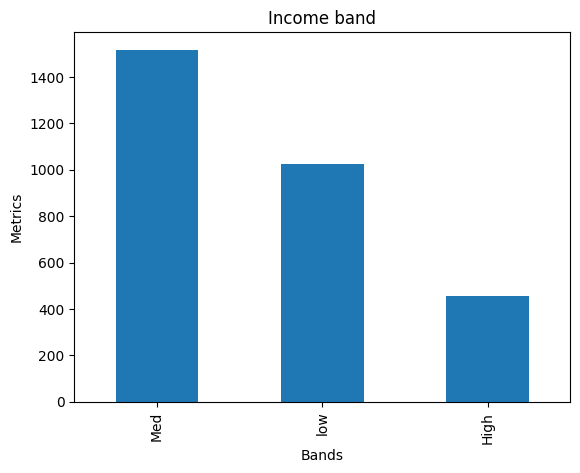

In [18]:
df['Income Band'].value_counts().plot(title="Income band", ylabel = "Metrics", xlabel="Bands", kind= 'bar')

**INSIGHT**: Majority are medium-income earners --a stable segment of core banking products 

 ## 4. Univariate Analysis 
 - Examining the Distribution of Unique Categories
      - By displaying the frequency distribution (Counts of Unique values).

In [19]:
df.nunique()
#Number of Unique categories per demography

Client ID                   2540
Name                        2913
Age                           69
Location ID                 2890
Joined Bank                 2579
Banking Contact               49
Nationality                    5
Occupation                   195
Fee Structure                  3
Loyalty Classification         4
Estimated Income            3000
Superannuation Savings      2997
Amount of Credit Cards         3
Credit Card Balance         2996
Bank Loans                  2973
Bank Deposits               2967
Checking Accounts           2967
Savings Account             2967
Foreign Currency Account    3000
Business Lending            2987
Properties Owned               4
Risk Weighting                 5
BRId                           4
GenderId                       2
IAId                          22
Income Band                    3
dtype: int64

In [20]:
categorical_cols =df[["BRId", "GenderId","IAId",  "Amount of Credit Cards", "Nationality", "Occupation","Fee Structure", "Loyalty Classification", "Properties Owned", "Risk Weighting","Income Band"]].columns
for col in categorical_cols:
    print(f"value counts for '{col}' : ")
    display(df[col].value_counts())

value counts for 'BRId' : 


BRId
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

value counts for 'GenderId' : 


GenderId
2    1512
1    1488
Name: count, dtype: int64

value counts for 'IAId' : 


IAId
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

value counts for 'Amount of Credit Cards' : 


Amount of Credit Cards
1    1922
2     765
3     313
Name: count, dtype: int64

value counts for 'Nationality' : 


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

value counts for 'Occupation' : 


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

value counts for 'Fee Structure' : 


Fee Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

value counts for 'Loyalty Classification' : 


Loyalty Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

value counts for 'Properties Owned' : 


Properties Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

value counts for 'Risk Weighting' : 


Risk Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

value counts for 'Income Band' : 


Income Band
Med     1517
low     1027
High     456
Name: count, dtype: int64

### Observation
**Occupation:** (*Top roles*): 
   - Associate Professor (28)
   - Structural Analysis Engineer(28)
      
**Loyalty Classification**
   -  The majority class is for "Jade" with 1331 clients(Approximately 44.4%)
      - This poses an opportunity to upsell premium services
                
**Risk Distribution:**
- Only 5.3% have high risk (weighting 5) – manageable exposure.

Text(0.5, 1.0, 'Top 10 Occupations (Excluding Rare Categories)')

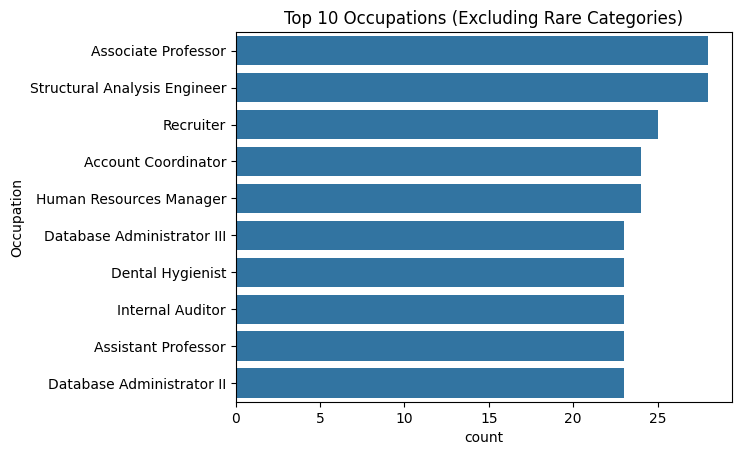

In [21]:
# Top 10 Occupations (without hue)  
top_occupations = df['Occupation'].value_counts().nlargest(10).index  
df_filtered = df[df['Occupation'].isin(top_occupations)] 
sns.countplot(data=df_filtered, y='Occupation', order=top_occupations)  
plt.title('Top 10 Occupations (Excluding Rare Categories)')  

### Observations ##
 **Concentration of Professional Roles:**
- The majority of top occupations (e.g., Associate Professor, Structural Analysis Engineer, Human Resources Manager) suggest a customer base with stable income streams and higher education levels. This may indicate lower credit risk and higher potential for premium banking products.

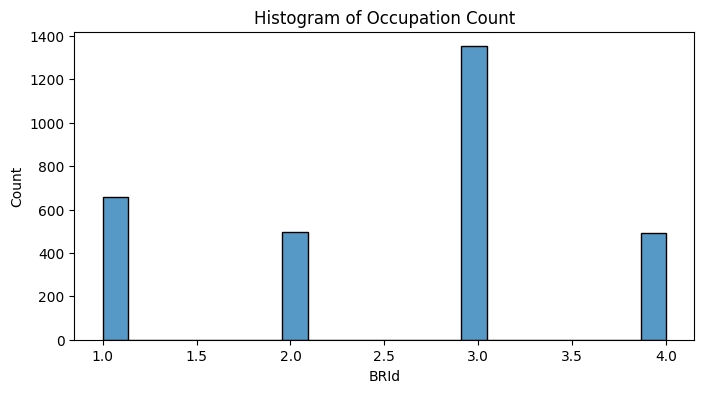

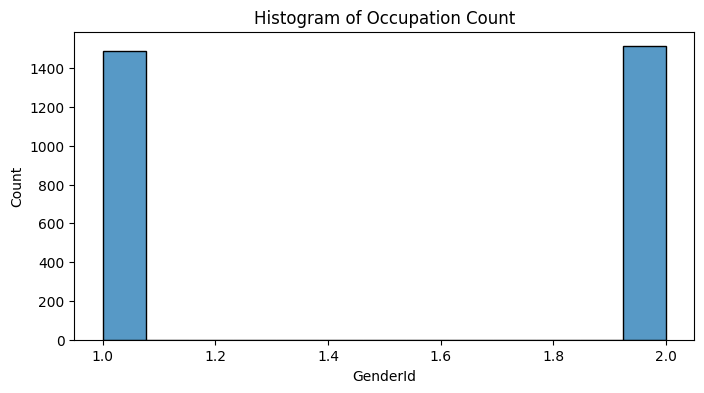

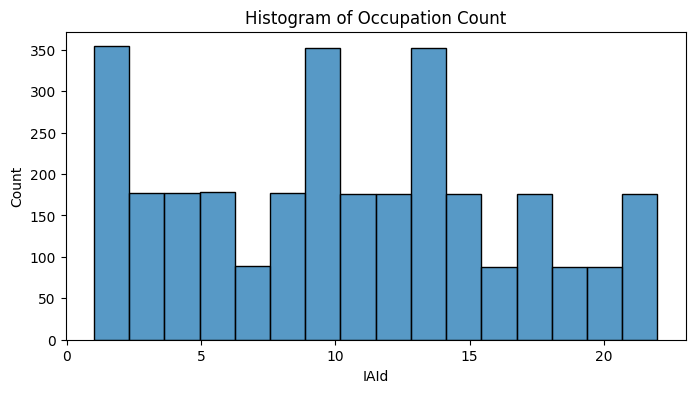

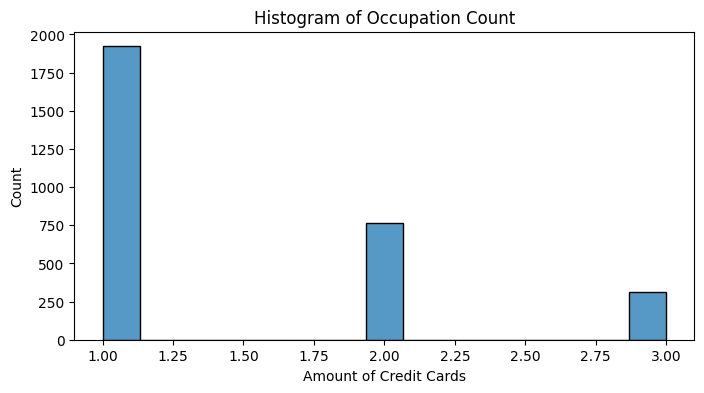

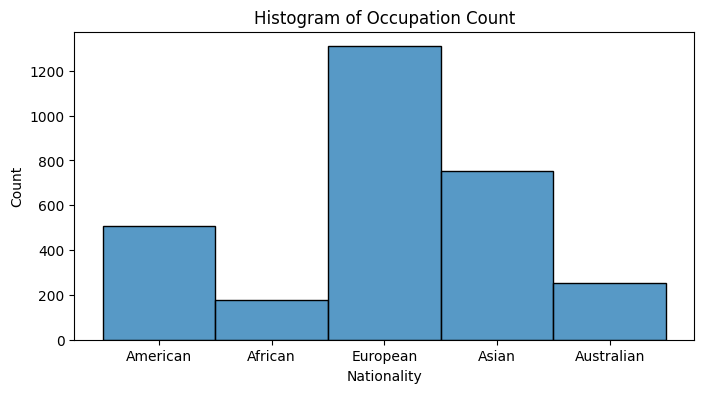

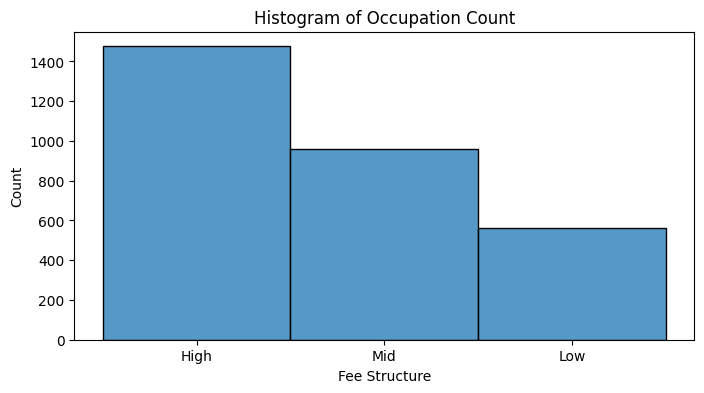

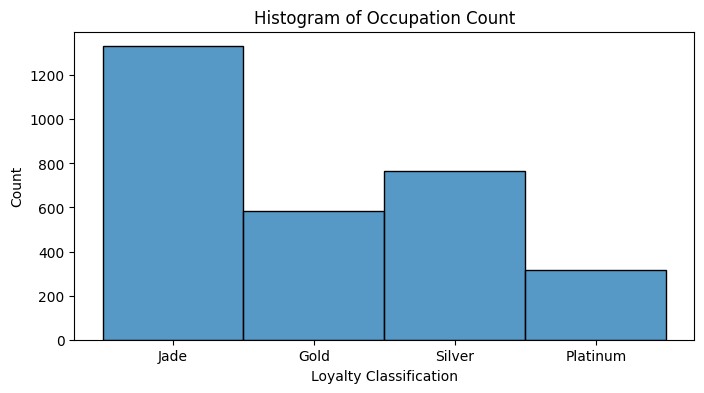

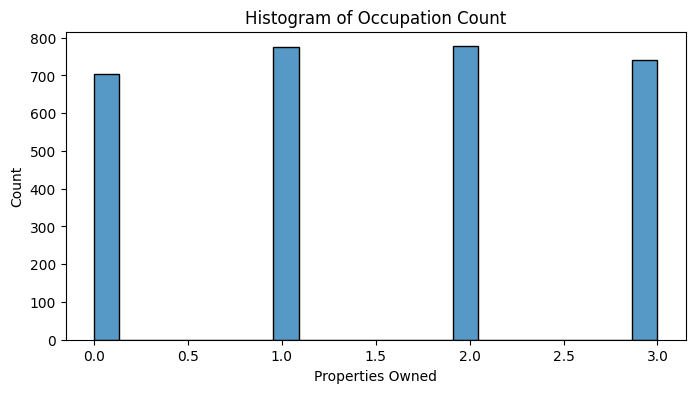

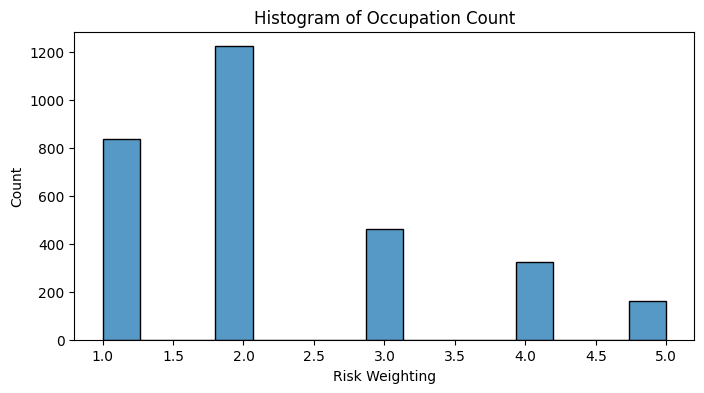

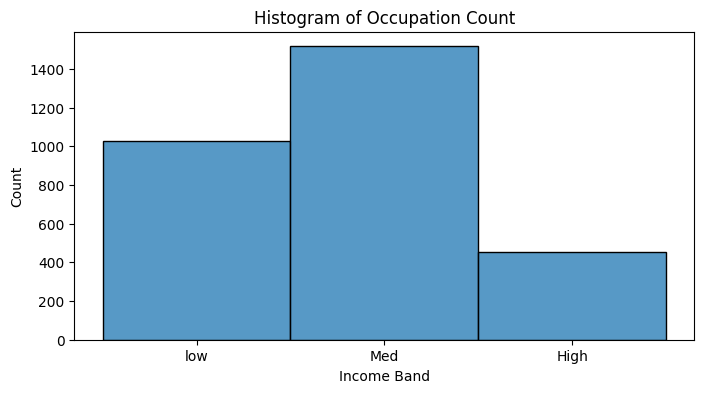

In [22]:
# Histplot of value counts for different Occupation
for col in categorical_cols:
    if col == "Occupation":
        continue
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title('Histogram of Occupation Count')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## 5. NUMERICAL ANALYSIS

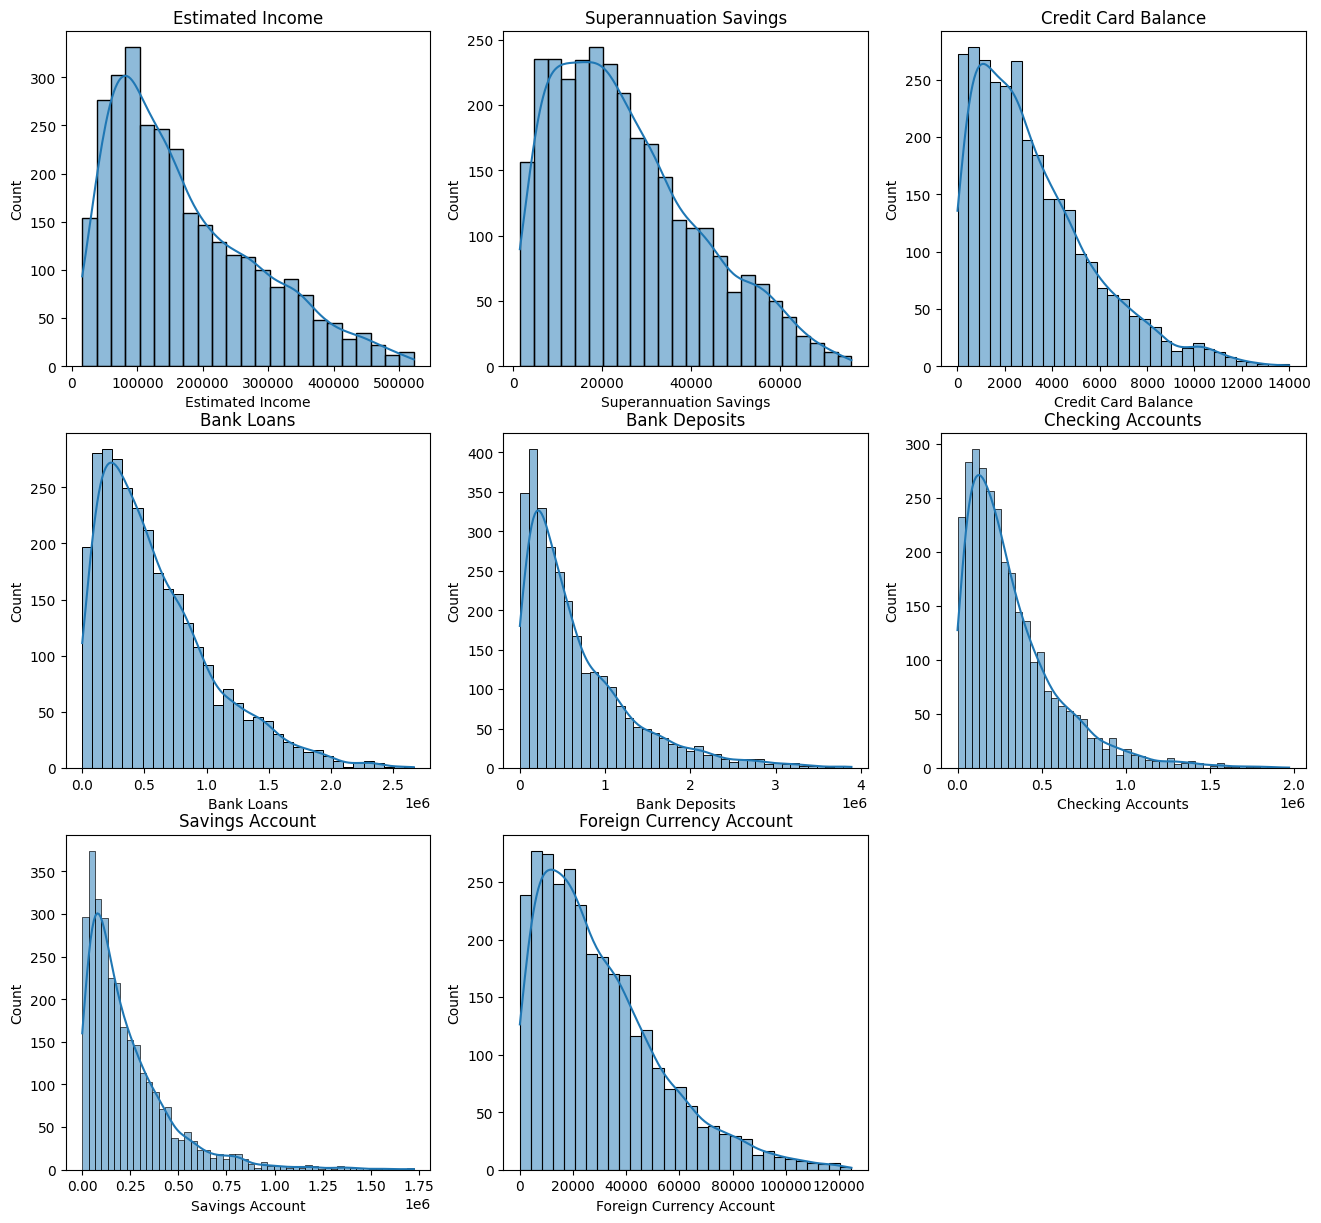

In [23]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance','Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Savings Account', 'Foreign Currency Account']
# Univariate Analysis and Visualization
plt.figure(figsize=(16,20))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,3, i+1)
    sns.histplot(df[col],kde=True)
    plt.title(col)
plt.show()

## HEATMAP

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Client ID                 3000 non-null   object  
 1   Name                      3000 non-null   object  
 2   Age                       3000 non-null   int64   
 3   Location ID               3000 non-null   int64   
 4   Joined Bank               3000 non-null   object  
 5   Banking Contact           3000 non-null   object  
 6   Nationality               3000 non-null   object  
 7   Occupation                3000 non-null   object  
 8   Fee Structure             3000 non-null   object  
 9   Loyalty Classification    3000 non-null   object  
 10  Estimated Income          3000 non-null   float64 
 11  Superannuation Savings    3000 non-null   float64 
 12  Amount of Credit Cards    3000 non-null   int64   
 13  Credit Card Balance       3000 non-null   float6

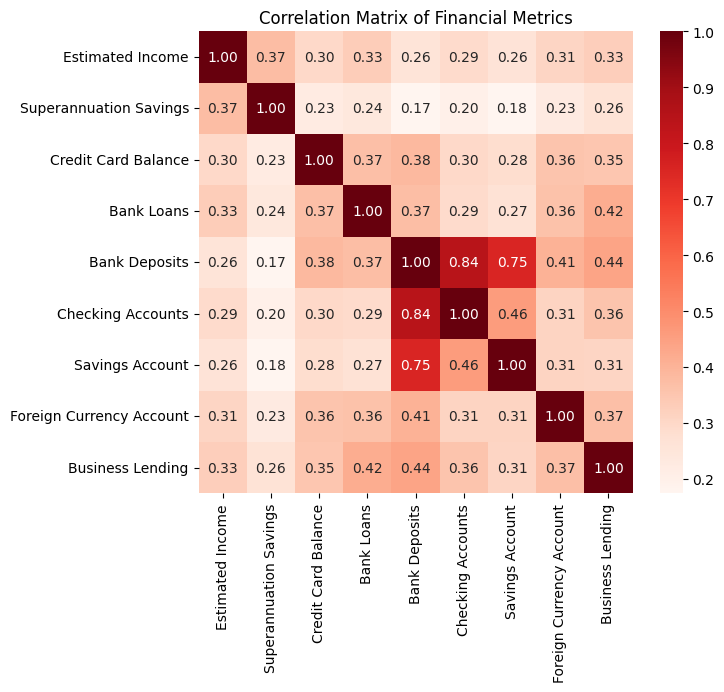

In [25]:
numerical_cols = ['Estimated Income', 'Superannuation Savings', 'Credit Card Balance','Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Savings Account', 'Foreign Currency Account', 'Business Lending']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(7,6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Matrix of Financial Metrics")
plt.show()

## INSIGHTS OF EDA
- The strongest positive correlation occur among "Bank Deposits" with "Checking Accounts" and "Foreign Currency Account" indicating that customers who maintain high balances in one account type often hold subtantial ammount/funds accross other accounts as well

## 6. KEY INSIGHTS FOR STAKE HOLDERS
**i) Youth Segment(<30 Years)**
  - Low deposits (e.g , avg. USD 641K vs overall USD 671K) but low default risk (weighting 2–3).
  - **Opportunity:** Target with starter loan products (e.g., education, small business).

**ii) High-Income Clients (≥$300K):**

- High deposits (avg. $1.48M) but low loan demand (only 15.2% of portfolio).
- **Strategy**: Promote wealth management/trust services.

**iii) Risk Concentration:**
- European clients (43.6%) dominate – diversify to avoid regulatory red flags.
-   High-risk occupations (e.g., Software Consultant) need stricter loan scrutiny.

**iv) Operational Efficienciency**

- **Fee Structure:** 49.2% on "High" fee plans – optimize tiered pricing.


